**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# import data 2C_weka.csv for 2 Class Classifcation.


In [195]:
missing=['','-','na','NA','N/A'] #Assuming a set of missing values/na_values
Weka2C_df = pd.read_csv('2Classdata.csv', na_values=missing);
Weka2C_df.shape # Dataset with 310 rows with 7 columns

(310, 7)

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [196]:
Weka2C_df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [197]:
Weka2C_df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [198]:
#Missing values - No missing values
print(Weka2C_df.isnull().sum())
print(Weka2C_df.isna().sum())

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64
pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


In [199]:
Weka2C_df['class'].unique() #Distinct values of the columns

array(['Abnormal', 'Normal'], dtype=object)

In [200]:
Weka2C_df.groupby(by='class').count() #We have distribution of 2:1 among the different parameters with class
#Abnormal cases being 210 and Normal cases being 100 from the dataset

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


In [201]:
Weka2C_df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [202]:
Weka2C_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


'As show in this distribution \nFor Abnormal cases the pelvic_radius has shown considerable variance in the values with ouliers accumulation\nas low as 70.082575 to as high as 163.071041\nFor normal cases the pelvic_radius has a decent defined range from some where 142+ to 99+ units'

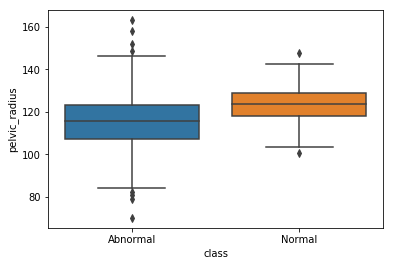

In [138]:
sns.boxplot(x='class', y ='pelvic_radius', data=Weka2C_df);
'''As show in this distribution 
For Abnormal cases the pelvic_radius has shown considerable variance in the values with ouliers accumulation
as low as 70.082575 to as high as 163.071041
For normal cases the pelvic_radius has a decent defined range from some where 142+ to 99+ units'''

'As per the distribution for Abnormal cases we have considerable distribution of Sacral_slope\nas compared to Normal cases distribution for Sacral_slope'

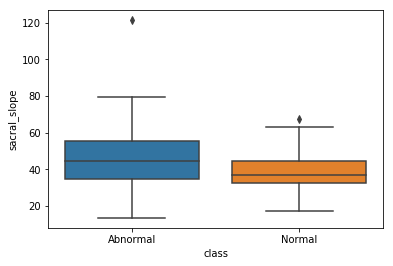

In [139]:
sns.boxplot(x='class', y ='sacral_slope', data=Weka2C_df);
'''As per the distribution for Abnormal cases we have considerable distribution of Sacral_slope
as compared to Normal cases distribution for Sacral_slope'''

# Encode the Class variable to integer.

In [140]:
Weka2C_df.dtypes # Currently of obect type

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [152]:
Weka2C_df['class'] = Weka2C_df['class'].astype('category') # Using simple Label encoding and converting values into numbers
Weka2C_df['class'] = Weka2C_df['class'].cat.codes
Weka2C_df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [153]:
Weka2C_Feature_df = Weka2C_df.drop(labels='class', axis=1) #Creating df without target datafield class
Weka2C_Feature_df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [192]:
Weka2C_class = Weka2C_df['class']
Weka2C_class.unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

# Normalize your Data (X) to get values between 0 to 1.

In [191]:
# convertint the features into z scores as we do not know units used in dataframe
Weka2C_Feature_z = Weka2C_Feature_df.apply(zscore)  # convert all attributes to Z scale 
Weka2C_Feature_z.describe()

X = np.array(Weka2C_Feature_df_z)
X.shape

(310, 6)

In [159]:
y = np.array(Weka2C_class)

# Split the dat as train and test with a ratio of 70:30.

In [160]:
# Splited X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [161]:
# Using Nearest Neighbour algorithm
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')
NNH.fit(X_train, y_train) # Fitted the train data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [162]:
predicted_labels = NNH.predict(X_test) # Predicted the labels for class based on the test data

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [163]:
NNH.score(X_test,y_test)

0.7849462365591398

In [151]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))
'''As evident the prediction model has very low accuracy level in making the class predictions'''

[[54 12]
 [ 8 19]]


'As evident the prediction model has very low accuracy level in making the class predictions'

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
for i in range(1,15):
        NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance')
        NNH.fit(X_train, y_train)
        predicted_labels = NNH.predict(X_test)
        print('Testing Accuracy score for k value ', i ,' - ',NNH.score(X_test,y_test))

Testing Accuracy score for k value  1  -  0.7419354838709677
Testing Accuracy score for k value  2  -  0.7419354838709677
Testing Accuracy score for k value  3  -  0.7741935483870968
Testing Accuracy score for k value  4  -  0.7634408602150538
Testing Accuracy score for k value  5  -  0.7849462365591398
Testing Accuracy score for k value  6  -  0.7849462365591398
Testing Accuracy score for k value  7  -  0.7849462365591398
Testing Accuracy score for k value  8  -  0.7956989247311828
Testing Accuracy score for k value  9  -  0.7849462365591398
Testing Accuracy score for k value  10  -  0.8172043010752689
Testing Accuracy score for k value  11  -  0.8064516129032258
Testing Accuracy score for k value  12  -  0.7956989247311828
Testing Accuracy score for k value  13  -  0.7849462365591398
Testing Accuracy score for k value  14  -  0.7956989247311828


In [ ]:
'''K = 10 shows higher accuracy '''

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [203]:
missing=['','-','na','NA','N/A'] #Assuming a set of missing values/na_values
Weka3C_df = pd.read_csv('3Classdata.csv', na_values=missing);
Weka3C_df.shape # Dataset with 310 rows with 7 columns

(310, 7)

# Explore the data set.Get necessary information about the data.


Look at the head and tail of dataset. Find the missing value. Look at the unique values of class values. Look at the distribution of class values and other attributes. Get the datatype information about the dataset Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [204]:
Weka3C_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [205]:
Weka3C_df.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [206]:
#Missing values - No missing values
print(Weka3C_df.isnull().sum())
print(Weka3C_df.isna().sum())

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64
pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


In [207]:
Weka3C_df['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [172]:
Weka3C_df.groupby(by='class').count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,150,150,150,150,150,150


In [208]:
Weka3C_df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [209]:
Weka3C_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


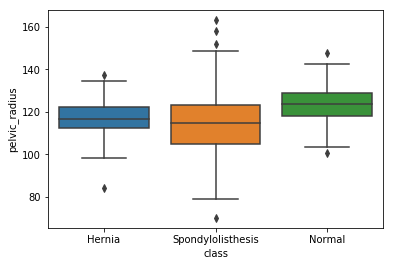

In [210]:
sns.boxplot(x='class', y ='pelvic_radius', data=Weka3C_df);

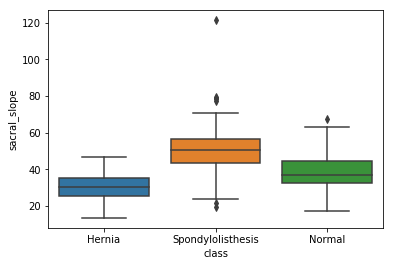

In [211]:
sns.boxplot(x='class', y ='sacral_slope', data=Weka3C_df);

Encode the Class variable to integer.


In [212]:
Weka3C_df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [213]:
Weka3C_df['class'] = Weka3C_df['class'].astype('category') # Using simple Label encoding and converting values into numbers
Weka3C_df['class'] = Weka3C_df['class'].cat.codes
Weka3C_df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0


In [214]:
Weka3C_df['class'].unique()

array([0, 2, 1], dtype=int64)

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [215]:
Weka3C_Feature_df = Weka3C_df.drop(labels='class', axis=1) #Creating df without target datafield class
Weka3C_Feature_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [216]:
Weka3C_class = Weka3C_df['class']
Weka3C_class.unique()

array([0, 2, 1], dtype=int64)

# Normalize your Data (X) to get values between 0 to 1.

In [217]:
# convertint the features into z scores as we do not know units used in dataframe
Weka3C_Feature_z = Weka3C_Feature_df.apply(zscore)  # convert all attributes to Z scale 
Weka3C_Feature_z.describe()

X = np.array(Weka3C_Feature_z)
X.shape

(310, 6)

In [218]:
y = np.array(Weka3C_class)

#Split the dat as train and test with a ratio of 70:30.

In [ ]:
# Splited X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [219]:
# Using Nearest Neighbour algorithm
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')
NNH.fit(X_train, y_train) # Fitted the train data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [220]:
predicted_labels = NNH.predict(X_test) # Predicted the labels for class based on the test data

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [222]:
NNH.score(X_test,y_test)

0.7849462365591398

In [223]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))
'''As evident the prediction model has very low accuracy level in making the class predictions'''

[[54 12]
 [ 8 19]]


'As evident the prediction model has very low accuracy level in making the class predictions'

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
for i in range(1,15):
        NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance')
        NNH.fit(X_train, y_train)
        predicted_labels = NNH.predict(X_test)
        print('Testing Accuracy score for k value ', i ,' - ',NNH.score(X_test,y_test))

Testing Accuracy score for k value  1  -  0.6989247311827957
Testing Accuracy score for k value  2  -  0.6989247311827957
Testing Accuracy score for k value  3  -  0.7419354838709677
Testing Accuracy score for k value  4  -  0.7204301075268817
Testing Accuracy score for k value  5  -  0.7526881720430108
Testing Accuracy score for k value  6  -  0.7419354838709677
Testing Accuracy score for k value  7  -  0.7419354838709677
Testing Accuracy score for k value  8  -  0.7526881720430108
Testing Accuracy score for k value  9  -  0.7419354838709677
Testing Accuracy score for k value  10  -  0.7741935483870968
Testing Accuracy score for k value  11  -  0.7741935483870968
Testing Accuracy score for k value  12  -  0.7526881720430108
Testing Accuracy score for k value  13  -  0.7419354838709677
Testing Accuracy score for k value  14  -  0.7526881720430108


In [ ]:
'''K=10 gives higher accuracy'''